In [ ]:
import numpy as np
import pandas as pd
import os
import sqlite3 as sql
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl 
import matplotlib.pyplot as plt
import csv

In [ ]:
# All of the data from https://www.kaggle.com/datasets/datasnaek/chess?resource=download
entire_dataset = pd.read_csv("/Users/N-Dogg/UMD/Spring 23/CMSC320/Final Project/games2.csv")

# Pulled the headers from the CSV file
dataset_headers = entire_dataset.columns


In [ ]:
print(entire_dataset.size)

In [ ]:
#Only games that were rated, not "casual"
rated_dataset = entire_dataset[entire_dataset["rated"] == True]


In [ ]:
print(len(rated_dataset))

In [64]:
#This code block sums up the number of wins for each white, black, and tie and compiles a dictionary for all of the openings
#         num wins for black | num wins for white | num ties
# opening1
# opening2
# opening3
openings = {}
opening_freq = {}
for i, row in rated_dataset.iterrows():
    opening_name = row[14]
    winner = row[6]
    openings.setdefault(opening_name, [0, 0, 0, 0])  # white, black, tie, freq
    
    if winner == 'white':
        openings[opening_name][0] += 1
        openings[opening_name][3] += 1
    elif winner == 'black':
        openings[opening_name][1] += 1
        openings[opening_name][3] += 1
    elif winner == 'draw':
        openings[opening_name][2] += 1
        openings[opening_name][3] += 1

# openings = sorted(openings.keys())
display(openings)

{'Nimzowitsch Defense: Kennedy Variation': [1, 2, 0, 3],
 "King's Pawn Game: Leonardis Variation": [54, 53, 2, 109],
 "Queen's Pawn Game: Zukertort Variation": [47, 32, 5, 84],
 'Philidor Defense': [68, 35, 6, 109],
 'Blackmar-Diemer Gambit: Pietrowsky Defense': [2, 0, 0, 2],
 'Italian Game: Schilling-Kostic Gambit': [11, 20, 3, 34],
 'Scandinavian Defense: Mieses-Kotroc Variation': [129, 73, 5, 207],
 "English Opening: King's English Variation |  Reversed Closed Sicilian": [13,
  4,
  0,
  17],
 'Sicilian Defense: Smith-Morra Gambit #2': [45, 42, 5, 92],
 "Queen's Pawn Game: Chigorin Variation": [84, 91, 5, 180],
 'Scotch Game: Haxo Gambit': [8, 1, 0, 9],
 'Slav Defense': [13, 17, 3, 33],
 "Queen's Gambit Refused: Marshall Defense": [75, 28, 1, 104],
 'Sicilian Defense: Canal Attack |  Main Line': [10, 15, 0, 25],
 'Sicilian Defense': [125, 150, 8, 283],
 'Robatsch (Modern) Defense': [18, 14, 2, 34],
 'Blackmar-Diemer Gambit: Tartakower Variation': [1, 0, 0, 1],
 'Zukertort Opening: R

In [68]:
def top_n(num, d):
    return sorted(d.items(), key=lambda x:x[1][3], reverse=True)[0:num]

In [81]:
# x values (bins) for all histograms
sorted_openings = sorted(openings)
top_n_openings = top_n(50, openings)
x_values = [ele[0] for ele in top_n_openings]
display(top_n_openings)


[("Van't Kruijs Opening", [97, 198, 13, 308]),
 ('Sicilian Defense', [125, 150, 8, 283]),
 ('Sicilian Defense: Bowdler Attack', [97, 139, 12, 248]),
 ('French Defense: Knight Variation', [116, 100, 13, 229]),
 ('Scotch Game', [112, 99, 8, 219]),
 ('Scandinavian Defense: Mieses-Kotroc Variation', [129, 73, 5, 207]),
 ("Queen's Pawn Game: Mason Attack", [92, 86, 9, 187]),
 ('Scandinavian Defense', [80, 96, 10, 186]),
 ('Horwitz Defense', [96, 83, 5, 184]),
 ("Queen's Pawn Game: Chigorin Variation", [84, 91, 5, 180]),
 ('Caro-Kann Defense', [95, 74, 6, 175]),
 ('Philidor Defense #2', [81, 79, 7, 167]),
 ('Italian Game: Anti-Fried Liver Defense', [83, 60, 8, 151]),
 ('Philidor Defense #3', [98, 50, 3, 151]),
 ('Sicilian Defense: Old Sicilian', [51, 83, 5, 139]),
 ('Modern Defense', [63, 71, 4, 138]),
 ('Indian Game', [51, 77, 10, 138]),
 ("King's Pawn Game: Wayward Queen Attack", [63, 67, 6, 136]),
 ('Four Knights Game: Italian Variation', [80, 50, 5, 135]),
 ('Hungarian Opening', [55, 57,

/var/folders/m0/7mtk_4hd41b91xmjskxcdf1r0000gn/T/ipykernel_48831/481663314.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_w.set_xticklabels(x_values, rotation=90)


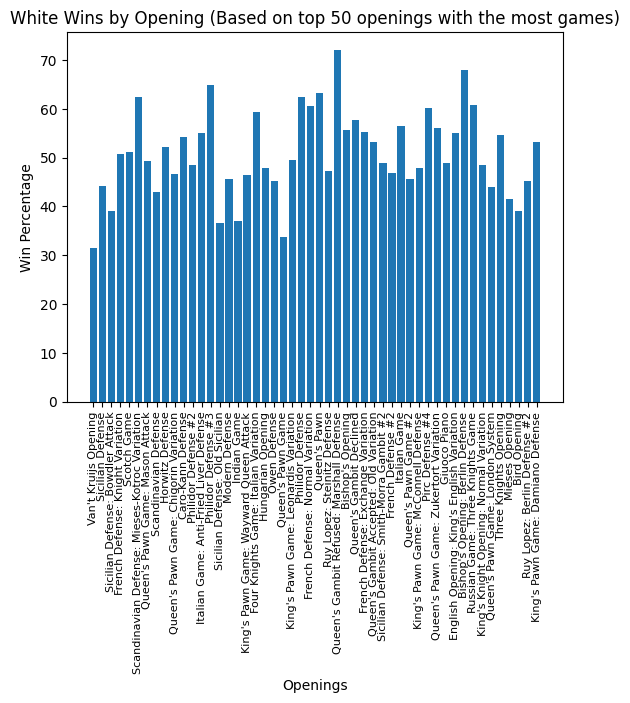

In [109]:
# make histogram for white win percentage
white_wins = []
for opening in top_n_openings:
    wins = opening[1][0]
    freq = opening[1][3]
    white_wins.append(100 * float(wins / freq))

# plot histogram
# Create a figure and axis
fig_w, ax_w = plt.subplots()


# Create a bar chart
ax_w.bar(x_values, white_wins)

# Set labels and title
ax_w.set_xticklabels(x_values, rotation=90)
plt.xticks(fontsize=8)
ax_w.set_xlabel('Openings')
ax_w.set_ylabel('Win Percentage')
ax_w.set_title('White Wins by Opening (Based on top 50 openings with the most games)')
plt.show()

/var/folders/m0/7mtk_4hd41b91xmjskxcdf1r0000gn/T/ipykernel_48831/2003240813.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(x_values, rotation=90)


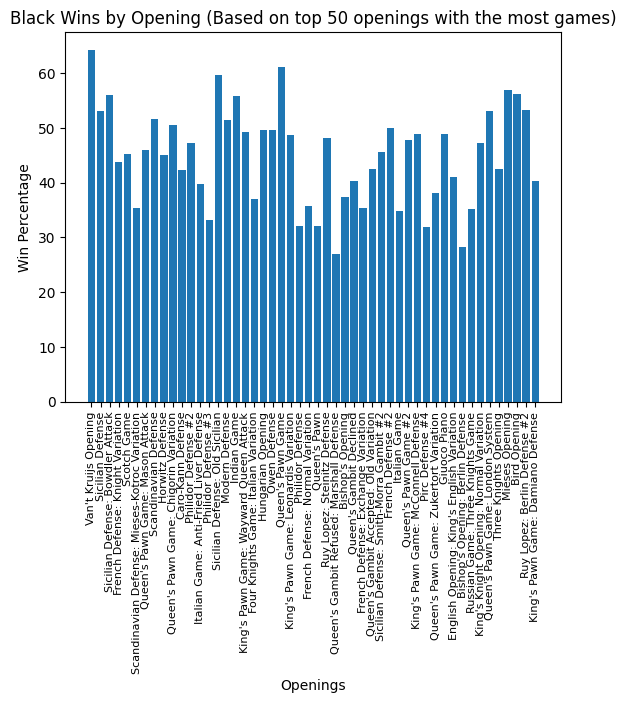

In [110]:
# make histogram for black win percentage
black_wins = []
for opening in top_n_openings:
    wins = opening[1][1]
    freq = opening[1][3]
    black_wins.append(100 * float(wins / freq))

# plot histogram
# Create a figure and axis
fig_b, ax_b = plt.subplots()

# Create a bar chart
ax_b.bar(x_values, black_wins)

# Set labels and title
ax_b.set_xticklabels(x_values, rotation=90)
plt.xticks(fontsize=8)
ax_b.set_xlabel('Openings')
ax_b.set_ylabel('Win Percentage')
ax_b.set_title('Black Wins by Opening (Based on top 50 openings with the most games)')
plt.show()

/var/folders/m0/7mtk_4hd41b91xmjskxcdf1r0000gn/T/ipykernel_48831/1161437041.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_d.set_xticklabels(x_values, rotation=90)


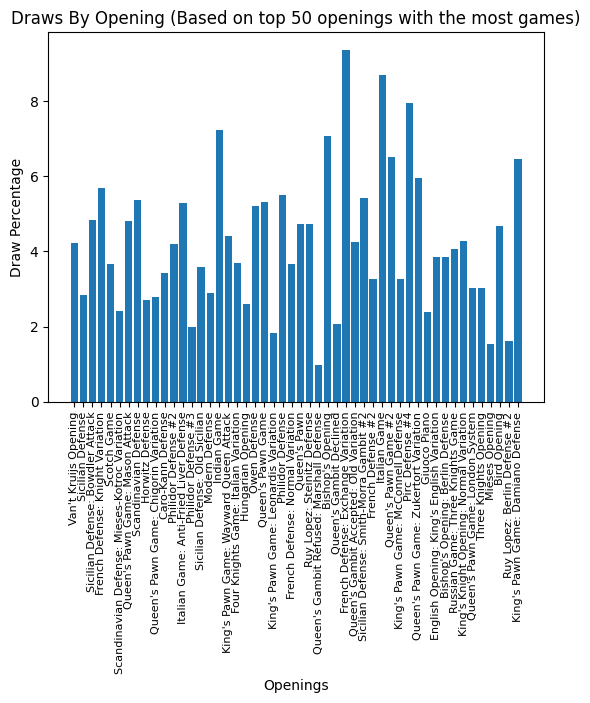

In [111]:
# make histogram for draw percentage
draws = []
for opening in top_n_openings:
    num_draws = opening[1][2]
    freq = opening[1][3]
    draws.append(100 * float(num_draws / freq))

# plot histogram
# Create a figure and axis
fig_d, ax_d = plt.subplots()

# Create a bar chart
ax_d.bar(x_values, draws)

# Set labels and title
ax_d.set_xticklabels(x_values, rotation=90)
plt.xticks(fontsize=8)
ax_d.set_xlabel('Openings')
ax_d.set_ylabel('Draw Percentage')
ax_d.set_title('Draws By Opening (Based on top 50 openings with the most games)')
plt.show()